In [ ]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# Dataset Preparation
Downloading the dataset from `https://physionet.org` and storing it locally in a folder called `dataset/`

Note: If the dataset has been downloaded, do not run this cell.

You can download the dataset manually by going to the [website](https://physionet.org/content/mmash/1.0.0/).

In [1]:
!sudo apt-get install unzip
!sudo apt-get install wget

!wget -r -N -c -np https://physionet.org/files/mmash/1.0.0/

!mkdir ./dataset

# !unzip ./physionet.org/files/mmash/1.0.0/MMASH.zip -d dataset
!ls physionet.org/files/mmash/1.0.0/

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
wget is already the newest version (1.19.4-1ubuntu2.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
--2021-05-25 07:23:14--  https://physionet.org/files/mmash/1.0.0/
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘ph

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
data_path = os.path.join(os.getcwd(), "dataset/DataPaper")

os.chdir(data_path)

os.listdir()

['user_12',
 'user_18',
 'user_15',
 'user_17',
 'user_7',
 'user_9',
 'user_20',
 'user_14',
 'user_1',
 'user_10',
 'user_8',
 'user_16',
 'user_21',
 'user_2',
 'user_22',
 'user_11',
 'user_6',
 'user_5',
 'user_4',
 'user_3',
 'user_19',
 'user_13']

# Exploratory Data Analysis of MMASH

In [ ]:
user_1 = os.path.join(data_path, "user_1")

sorted(os.listdir(user_1))

['Actigraph.csv',
 'Activity.csv',
 'RR.csv',
 'questionnaire.csv',
 'saliva.csv',
 'sleep.csv',
 'user_info.csv']

## Actigraph

In [ ]:
actigraph = pd.read_csv(os.path.join(user_1, 'Actigraph.csv'))

actigraph.head(20)

,Unnamed: 0,Axis1,Axis2,Axis3,Steps,HR,Inclinometer Off,Inclinometer Standing,Inclinometer Sitting,Inclinometer Lying,Vector Magnitude,day,time
0,82,0,0,0,0,68.0,0,1,0,0,0.00,1,10:10:22
1,83,11,4,7,1,68.0,0,1,0,0,13.64,1,10:10:23
2,84,0,21,10,0,68.0,0,0,1,0,23.26,1,10:10:24
3,85,0,1,24,0,68.0,0,0,1,0,24.02,1,10:10:25
4,86,34,14,63,1,154.0,0,1,0,0,72.95,1,10:10:26
5,87,101,10,90,0,161.0,0,1,0,0,135.65,1,10:10:27
6,88,17,18,49,0,177.0,0,1,0,0,54.90,1,10:10:28
7,89,0,34,23,0,177.0,0,1,0,0,41.05,1,10:10:29
8,90,12,50,13,1,177.0,0,1,0,0,53.04,1,10:10:30
9,91,32,38,36,0,177.0,0,1,0,0,61.35,1,10:10:31


In [ ]:
# Creating three new rows corresponding to the numerical values of hours, minutes and seconds

actigraph["time h"] = actigraph["time"].apply(lambda s: int(s[:2]))
actigraph["time m"] = actigraph["time"].apply(lambda s: int(s[3:5]))
actigraph["time s"] = actigraph["time"].apply(lambda s: int(s[6:]))

actigraph

,Unnamed: 0,Axis1,Axis2,Axis3,Steps,HR,Inclinometer Off,Inclinometer Standing,Inclinometer Sitting,Inclinometer Lying,Vector Magnitude,day,time,time h,time m,time s
0,82,0,0,0,0,68.0,0,1,0,0,0.00,1,10:10:22,10,10,22
1,83,11,4,7,1,68.0,0,1,0,0,13.64,1,10:10:23,10,10,23
2,84,0,21,10,0,68.0,0,0,1,0,23.26,1,10:10:24,10,10,24
3,85,0,1,24,0,68.0,0,0,1,0,24.02,1,10:10:25,10,10,25
4,86,34,14,63,1,154.0,0,1,0,0,72.95,1,10:10:26,10,10,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67931,84985,31,0,31,1,119.0,0,1,0,0,43.84,2,09:45:25,9,45,25
67932,84986,34,0,17,0,121.0,0,1,0,0,38.01,2,09:45:26,9,45,26
67933,84987,7,4,3,0,123.0,0,1,0,0,8.60,2,09:45:27,9,45,27
67934,84988,12,50,13,0,124.0,0,1,0,0,53.04,2,09:45:28,9,45,28


In [ ]:
# Getting a subdataframe containing the first 30 minutes of sleep according to the activity data (activity = 0)

actigraphy_first_30_min = actigraph[(actigraph["time h"] == 0) & (actigraph["time m"] > 30)]

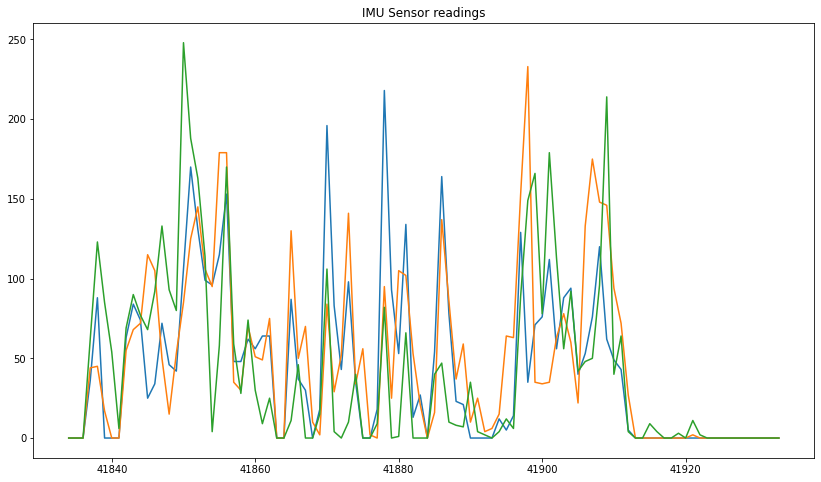

In [ ]:
# Plotting readings of the three axis from the IMU sensor

ax1 = actigraphy_first_30_min["Axis1"]
ax2 = actigraphy_first_30_min["Axis2"]
ax3 = actigraphy_first_30_min["Axis3"]

plt.figure(figsize=(14,8))
plt.title("IMU Sensor readings")

plt.plot(ax1[:100])
plt.plot(ax2[:100])
plt.plot(ax3[:100])

plt.show();

## Activity

In [ ]:
activity = pd.read_csv(os.path.join(user_1, 'Activity.csv'))

activity

,Unnamed: 0,Activity,Start,End,Day
0,0,2,10:00,10:22,1
1,1,9,10:37,10:40,1
2,2,10,10:40,10:45,1
3,3,6,10:55,11:00,1
4,4,2,11:00,11:20,1
5,5,7,12:00,13:00,1
6,6,4,13:30,13:35,1
7,7,10,13:35,13:40,1
8,8,3,13:40,13:45,1
9,9,6,13:55,14:30,1


In [ ]:
activity[activity["Activity"] == 0]  # it seems that activity being 0 corresponds to sleep, but shouldn't it be 1?

,Unnamed: 0,Activity,Start,End,Day
30,30,0,00:30,NaN,2


## RR

In [ ]:
rr_interval = pd.read_csv(os.path.join(user_1, 'RR.csv'))

rr_interval.head(20)

,Unnamed: 0,ibi_s,day,time
0,1,0.258,1,10:10:17
1,2,0.319,1,10:10:18
2,3,0.266,1,10:10:18
3,4,0.401,1,10:10:18
4,5,1.089,1,10:10:19
5,6,0.752,1,10:10:20
6,7,0.337,1,10:10:20
7,8,0.933,1,10:10:21
8,9,0.731,1,10:10:22
9,10,0.454,1,10:10:23


## Questionnaire

In [ ]:
questionnaire = pd.read_csv(os.path.join(user_1, 'questionnaire.csv'))

questionnaire

,Unnamed: 0,MEQ,STAI1,STAI2,Pittsburgh,Daily_stress,BISBAS_bis,BISBAS_reward,BISBAS_drive,BISBAS_fun,panas_pos_10,panas_pos_14,panas_pos_18,panas_pos_22,panas_pos_9+1,panas_neg_10,panas_neg_14,panas_neg_18,panas_neg_22,panas_neg_9+1
0,0,47,41,43,5,23,22,21,14,14,21,17,12,18,17,11,13,13,10,10


## Saliva

In [ ]:
saliva = pd.read_csv(os.path.join(user_1, 'saliva.csv'))

saliva

,Unnamed: 0,SAMPLES,Cortisol NORM,Melatonin NORM
0,1,before sleep,0.034137,1.738385e-08
1,2,wake up,0.077939,6.747893e-09


## Sleep

In [ ]:
sleep = pd.read_csv(os.path.join(user_1, 'sleep.csv'))

sleep

,Unnamed: 0,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time,Onset Date,Onset Time,Latency,Efficiency,Total Minutes in Bed,Total Sleep Time (TST),Wake After Sleep Onset (WASO),Number of Awakenings,Average Awakening Length,Movement Index,Fragmentation Index,Sleep Fragmentation Index
0,0,2,00:46,2,03:31,2,00:46,0,87.27,165,144,21,9,2.33,9.091,10,19.091
1,1,2,03:57,2,07:30,2,03:57,0,92.02,213,196,17,9,1.89,8.920,0,8.920


## User Info

In [ ]:
user_info = pd.read_csv(os.path.join(user_1, 'user_info.csv'))

user_info

,Unnamed: 0,Gender,Weight,Height,Age
0,0,M,65,169,29
